In [1]:
import pickle
window_col,label_col = pickle.load(open('./data_saved/window_col_sqi.p','rb'))

In [2]:
from scipy.stats import skew,kurtosis
import numpy as np
from scipy import signal
def get_metric(x):
    f,pxx = signal.welch(x,fs=25,nperseg=len(x),nfft=10000)
    pxx = np.abs(pxx)
    pxx = pxx/max(pxx)
    peaks_loc1,_ = signal.find_peaks(pxx[np.where((f>.8)&(f<2.5))[0]],height=.1)
    if len(peaks_loc1)==0:
        return [skew(x),kurtosis(x),np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx),-1]
    else:
        return [skew(x),kurtosis(x),np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx),10]
feature = np.zeros((0,4))
for i,a in enumerate(window_col):
    if label_col[i]==1:
        tmp = get_metric(a[:,4])
        if tmp[-1]==10:
            tmp = np.array(tmp[:3]+[1]).reshape(-1,4)
            feature = np.concatenate((feature,tmp))
    elif label_col[i]==0:
        tmp = get_metric(a[:,4])
        if tmp[-1]==-1:
            tmp = np.array(tmp[:3]+[-1]).reshape(-1,4)
            feature = np.concatenate((feature,tmp))
print(len(feature))

19491


In [ ]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
# fig,ax = plt.subplots(ncols=1,nrows=2)
# sns.scatterplot(x=feature[:,0],y=feature[:,2],ax=ax[0],color='y')
# sns.scatterplot(x=feature[:,0],y=feature[:,1],ax=ax[1],color='c')
# ax[0].set_xlim([-2,2])
# ax[1].set_xlim([-2,2])
# plt.scatter(feature[:,0],feature[:,1],c=feature[:,2])
# plt.show()

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x=feature[:,0], y=feature[:,1], kind="hex", color="b")
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
# plt.xlim([-1,1])

<IPython.core.display.Javascript object>


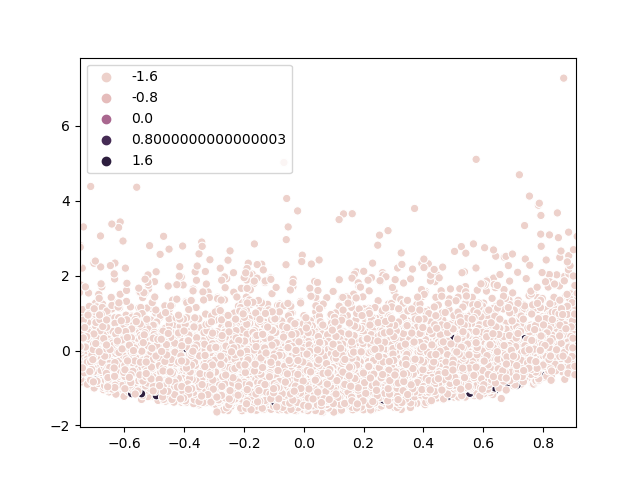

In [4]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=feature[:,0],y=feature[:,1],hue=feature[:,-1])


In [11]:
import pandas as pd
df = pd.DataFrame(data=feature,    # values
              index=range(feature.shape[0]),    # 1st column as index
              columns=['Skewness','Kurtosis','Relative Power','Label'])
df['Label'][df['Label']==1] = 'Annotated Acceptable'
df['Label'][df['Label']==-1] = 'Irrecoverable'


<IPython.core.display.Javascript object>


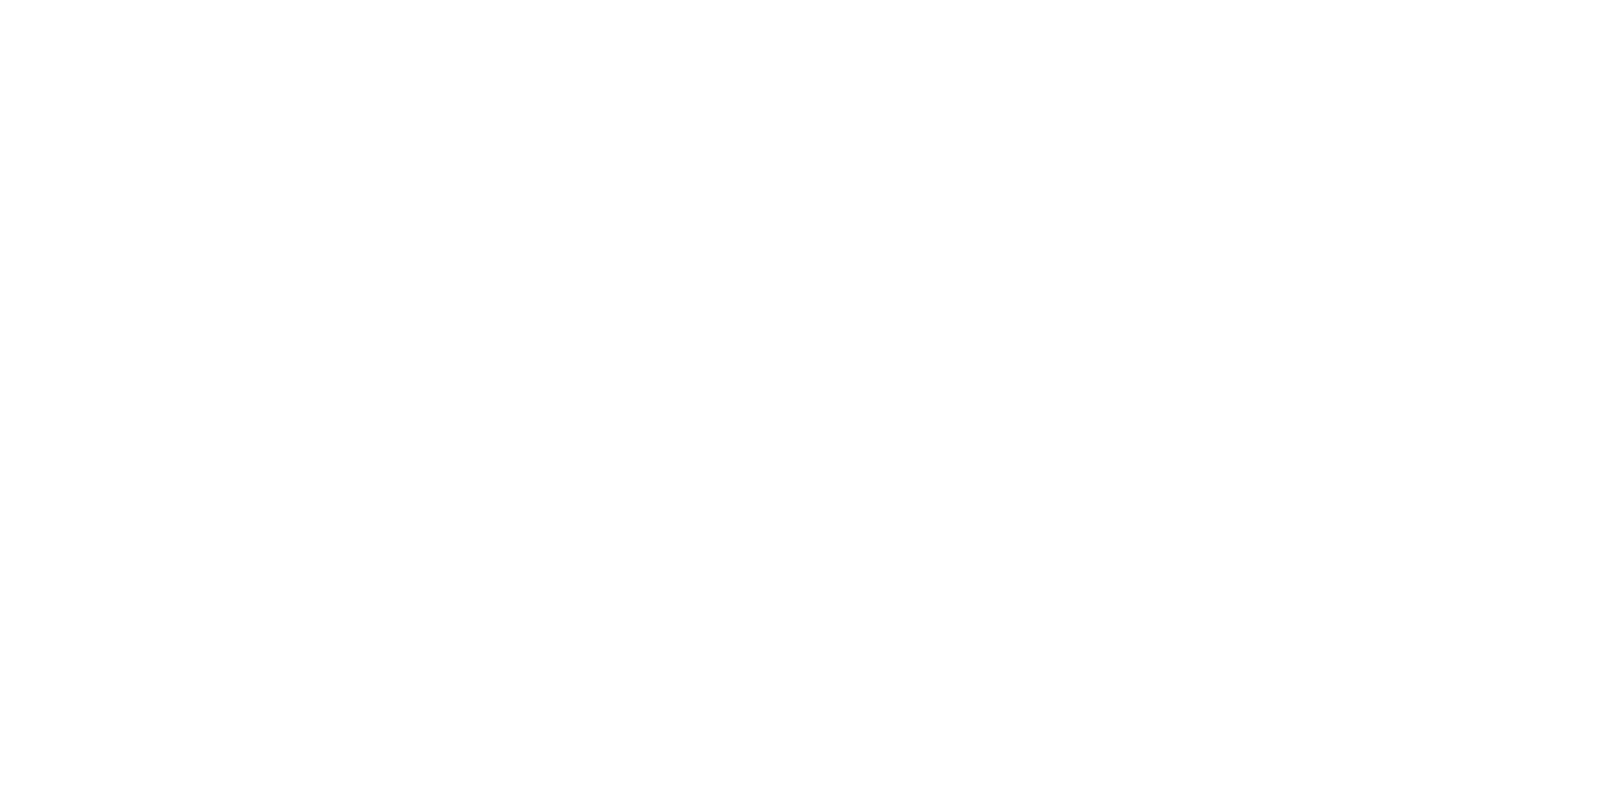

<IPython.core.display.Javascript object>


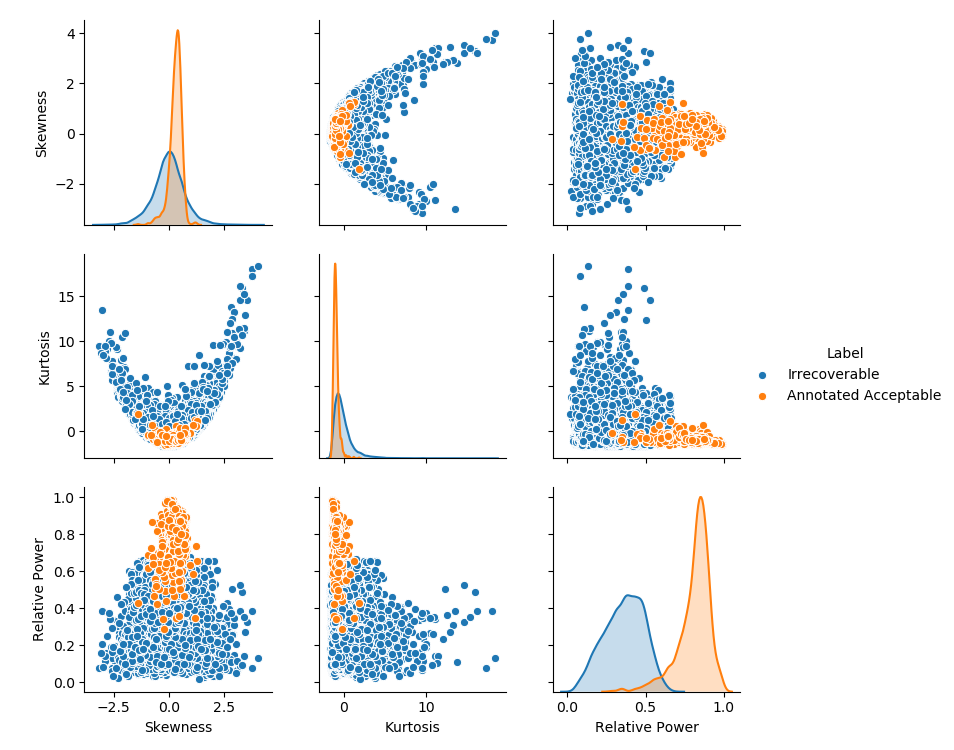

In [17]:
plt.figure(figsize=(16,8))
sns.pairplot(df, hue="Label")
plt.savefig('./data_saved/pairplot_good_irrecoverable_data.png',dps=1000)
plt.show()

In [18]:
np.unique(feature[:,-1])

array([-1.,  1.])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(penalty='l2',solver='lbfgs')
score = cross_val_score(clf,feature[:,:3],feature[:,-1],cv=10,scoring='accuracy')
print(np.mean(score)*100)
print(np.std(score)*100)


99.47660981306686
0.42317449036834986
